In [1]:
!pip install easyocr
!pip install imutils

  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/cb/0e/09bafec31db720e796d3f5b0814c37c5fdb59dcd35a2c6c6b1c774b09646/easyocr-1.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for torchvision>=0.5 from https://files.pythonhosted.org/packages/6a/38/e8257ad99ea2ec30bbb4e6d9d81f3fe796e39046bb060d80569cbf6d83e5/torchvision-0.19.0-1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for python-bidi from https://files.pythonhosted.org/packages/27/fc/381bb2c1b1595de5605ea8d10c9d5c0690a38e7f9667bc34213e78bd25b2/python_bidi-0.6.0-cp311-none-win_amd64.whl.metadata
  Obtaining dependency information for Shapely from https://files.pythonhosted.org/packages/ec/1b/092fff53cbeced411eed2717592e31cadd3e52f0ebaba5f2df3f34913f96/shapely-2.0.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyclipper from https://files.pythonhosted.org/packages/f3/ec/56da9f2d5d846f144530d5313a05078afb7cfc26ec179be5af35f0

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

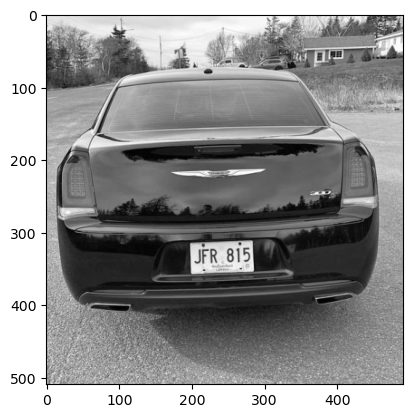

In [3]:
img = cv2.imread('t7.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

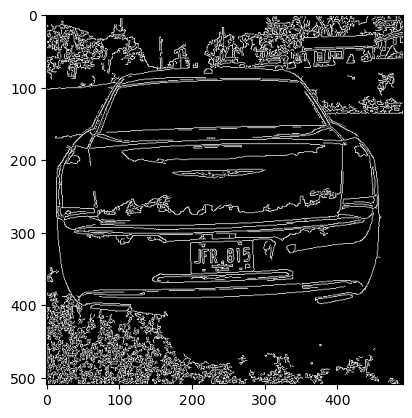

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[284, 313]],

       [[283, 354]],

       [[199, 355]],

       [[200, 314]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

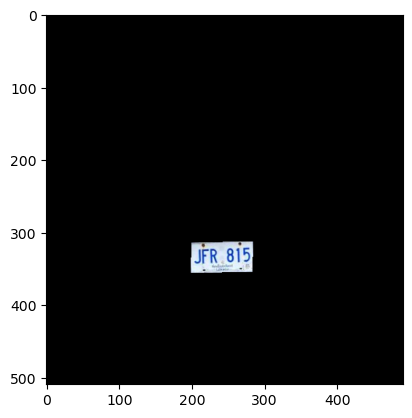

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

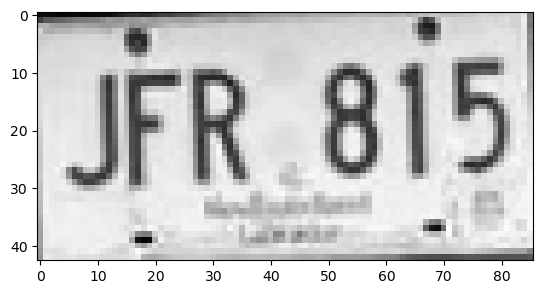

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [14]:
import warnings
warnings.filterwarnings("ignore")
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 1], [86, 1], [86, 37], [0, 37]], 'JFR 815', 0.8855088245153272)]

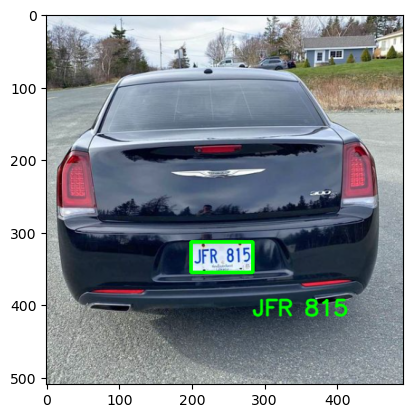

In [15]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))